# Grupo Bimbo Inventory Demand
[Link](https://www.kaggle.com/c/grupo-bimbo-inventory-demand)

## Describing "producto_tabla"

In [11]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col
from pyspark.sql.functions import sum

path = '/home/jasam/Downloads/bimbo/producto_tabla.csv'
product_table_rdd = (sc.textFile(path)
                     .map(lambda line: line.split(",")))

product_table_df = (product_table_rdd
                    .toDF(['producto_id','nombre_producto']))
#drop Header
product_table_df = (product_table_df
                    .filter(col('producto_id') != 'Producto_ID'))

product_table_df.show(20, False)

+-----------+----------------------------------------+
|producto_id|nombre_producto                         |
+-----------+----------------------------------------+
|0          |NO IDENTIFICADO 0                       |
|9          |Capuccino Moka 750g NES 9               |
|41         |Bimbollos Ext sAjonjoli 6p 480g BIM 41  |
|53         |Burritos Sincro 170g CU LON 53          |
|72         |Div Tira Mini Doradita 4p 45g TR 72     |
|73         |Pan Multigrano Linaza 540g BIM 73       |
|98         |Tostado Integral 180g WON 98            |
|99         |Pan Blanco 567g WON 99                  |
|100        |Super Pan Bco Ajonjoli 680g SP WON 100  |
|106        |Wonder 100pct mediano 475g WON 106      |
|107        |Wonder 100pct gde 680g SP WON 107       |
|108        |Baguette Precocida Cong 280g DH 108     |
|109        |Pan Multicereal 475g WON 109            |
|112        |Tostado Integral 180g WON 112           |
|122        |Biscotel Receta Original 410g CU SUA 122|
|123      

## Nulls in product_tabla

In [12]:
def count_null(col_name):
    return sum(col(col_name).isNull().cast('integer')).alias(col_name)

In [10]:
exprs = []
for col_name in product_table_df.columns:
    exprs.append(count_null(col_name))
# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
product_table_df.agg(*exprs).show()

TypeError: Column is not iterable

## Count rows - producto_tabla

In [57]:
format(product_table_df.count(), ',d')

'2,592'

## Describing "cliente_tabla"

In [3]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

path = '/home/jasam/Downloads/bimbo/cliente_tabla.csv'
customer_table_rdd = (sc.textFile(path)
                      .map(lambda line: line.split(",")))

customer_table_df = (customer_table_rdd
                     .toDF(['cliente_id','nombre_cliente']))
#drop Header
customer_table_df = (customer_table_df
                     .filter(col('cliente_id') != 'Cliente_ID'))

customer_table_df.show(20, False)

+----------+---------------------------------------+
|cliente_id|nombre_cliente                         |
+----------+---------------------------------------+
|0         |SIN NOMBRE                             |
|1         |OXXO XINANTECATL                       |
|2         |SIN NOMBRE                             |
|3         |EL MORENO                              |
|4         |SDN SER  DE ALIM  CUERPO SA CIA  DE INT|
|4         |SDN SER DE ALIM CUERPO SA CIA DE INT   |
|5         |LA VAQUITA                             |
|6         |LUPITA                                 |
|7         |I M EL GUERO                           |
|8         |MINI SUPER LOS LUPES                   |
|9         |SUPER KOMPRAS MICRO COLON              |
|10        |LONJA MERCANTIL DE TODO                |
|11        |FARMACIA NICOLAS SAN JUAN              |
|12        |PAPELERIA CATALA                       |
|13        |ELENA                                  |
|14        |CASA TRINO                        

## Nulls in customer_table_df

In [60]:
exprs = []
for col_name in customer_table_df.columns:
    exprs.append(count_null(col_name))
# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
customer_table_df.agg(*exprs).show()

+----------+--------------+
|cliente_id|nombre_cliente|
+----------+--------------+
|         0|             0|
+----------+--------------+



## Count rows - cliente_tabla

In [61]:
format(customer_table_df.count(), ',d')

'935,362'

## Describing "town_state"

In [5]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

path = '/home/jasam/Downloads/bimbo/town_state.csv'

# Clean data
town_state_table_rdd = (sc.textFile(path)
                        .map(lambda line: line.replace('MÉXICO,','MÉXICO')))

town_state_table_rdd = (town_state_table_rdd
                        .map(lambda line: line.split(",")))
town_state_table_df = (town_state_table_rdd
                       .toDF(['agency_id','town','state']))
#drop Header
town_state_table_df = (town_state_table_df
                       .filter(col('agency_id') != 'Agencia_ID'))

town_state_table_df.show(20, False)

+---------+-----------------------+----------------+
|agency_id|town                   |state           |
+---------+-----------------------+----------------+
|1110     |2008 AG. LAGO FILT     |"MÉXICO D.F."   |
|1111     |2002 AG. AZCAPOTZALCO  |"MÉXICO D.F."   |
|1112     |2004 AG. CUAUTITLAN    |ESTADO DE MÉXICO|
|1113     |2008 AG. LAGO FILT     |"MÉXICO D.F."   |
|1114     |2029 AG.IZTAPALAPA 2   |"MÉXICO D.F."   |
|1116     |2011 AG. SAN ANTONIO   |"MÉXICO D.F."   |
|1117     |2001 AG. ATIZAPAN      |ESTADO DE MÉXICO|
|1118     |2007 AG. LA VILLA      |"MÉXICO D.F."   |
|1119     |2013 AG. MEGA NAUCALPAN|ESTADO DE MÉXICO|
|1120     |2018 AG. TEPALCATES 2  |"MÉXICO D.F."   |
|1121     |2016 AG. SAN LORENZO   |"MÉXICO D.F."   |
|1122     |2019 AG. XALOSTOC      |ESTADO DE MÉXICO|
|1123     |2094 CHALCO_BM         |ESTADO DE MÉXICO|
|1124     |2021 AG. XOCHIMILCO 2  |"MÉXICO D.F."   |
|1126     |2017 AG. SANTA CLARA   |ESTADO DE MÉXICO|
|1127     |2003 AG. COACALCO      |ESTADO DE M

## Nulls in town_state_table_df

In [152]:
exprs = []
for col_name in town_state_table_df.columns:
    exprs.append(count_null(col_name))
# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
town_state_table_df.agg(*exprs).show()

+---------+----+-----+
|agency_id|town|state|
+---------+----+-----+
|        0|   0|    0|
+---------+----+-----+



## Count rows - town_state

In [153]:
format(town_state_table_df.count(), ',d')

'790'

## Group by state - count  - town_state table

In [154]:
(town_state_table_df.groupBy('state')
                    .count()
                    .orderBy(col('count').desc())
                    .show(20))

+--------------------+-----+
|               state|count|
+--------------------+-----+
|    ESTADO DE MÉXICO|   71|
|       "MÉXICO D.F."|   65|
|             JALISCO|   55|
|            VERACRUZ|   45|
|          GUANAJUATO|   39|
|              SONORA|   34|
|          NUEVO LEÓN|   34|
|              PUEBLA|   34|
|           MICHOACÁN|   33|
|          TAMAULIPAS|   32|
|BAJA CALIFORNIA N...|   32|
|            COAHUILA|   29|
|           CHIHUAHUA|   25|
|             SINALOA|   23|
|              OAXACA|   22|
|            GUERRERO|   21|
|             HIDALGO|   21|
| BAJA CALIFORNIA SUR|   17|
|             CHIAPAS|   16|
|     SAN LUIS POTOSÍ|   15|
+--------------------+-----+
only showing top 20 rows



## Describing "train data"

In [8]:
# Previously csv transformed into parquet files (improve perfomance 100x).
import time
start_time = time.time()
path = '/data/train_parquet/0_0_0.parquet'
train0_df = sqlContext.read.load(path)
#path = '/data/train_parquet/0_0_1.parquet'
#train1_df = sqlContext.read.load(path)
train_df = train0_df
#train_df = train0_df.unionAll(train1_df)
#train_df = (train_df.filter(train_df['semana'] != 'Semana'))
#cast data
#train_df = train_df.select(train_df.semana,
 #                          train_df.agencia_id,
  #                         train_df.canal_id,
   #                        train_df.ruta_sak,
    #                       train_df.cliente_id,
     #                      train_df.producto_id,
      #                     train_df.venta_uni_hoy.cast('float'),
       ##                    train_df.venta_hoy.cast('float'),
         #                  train_df.dev_uni_proxima.cast('float'),
          #                 train_df.dev_proxima.cast('float'),
           #                train_df.demanda_uni_equil.cast('float'))
print(format(train_df.count(), ',d'))
print("--- %s seconds ---" % (time.time() - start_time))

42,220,100
--- 1.5391318798065186 seconds ---


In [ ]:
path = '/data/train_parquet/'
train_df = sqlContext.read.parquet(path)
train_df.take(1)

In [4]:
test = sc.textFile("s3://eurekapi/producto_tabla.csv")
test.take(1)

Py4JJavaError: An error occurred while calling o87.partitions.
: java.io.IOException: No FileSystem for scheme: s3
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:2584)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:2591)
	at org.apache.hadoop.fs.FileSystem.access$200(FileSystem.java:91)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:2630)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:2612)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:370)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:296)
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:256)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:228)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:313)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:199)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:239)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:237)
	at scala.Option.getOrElse(Option.scala:120)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:237)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:239)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:237)
	at scala.Option.getOrElse(Option.scala:120)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:237)
	at org.apache.spark.api.java.JavaRDDLike$class.partitions(JavaRDDLike.scala:64)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:46)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)


In [3]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

path = '/data/train.csv'
train_table_rdd = (sc.textFile(path)
                   .map(lambda line: line.split(",")))
columns = ['week','agency_id','channel','route_sak','customer_id',
           'product_id','sale_uni_today','sale_today','dev_uni_prox',
           'dev_prox','demand_uni_equil']
train_table_df = (train_table_rdd
                  .toDF(columns))

#drop Header
train_table_df = (train_table_df
                  .filter(col('week') != 'Semana'))
#cast data
train_table_df = train_table_df.select(train_table_df.week,
                                       train_table_df.agency_id,
                                       train_table_df.channel,
                                       train_table_df.route_sak,
                                       train_table_df.customer_id,
                                       train_table_df.product_id,
                                       train_table_df.sale_uni_today.cast('float'),
                                       train_table_df.sale_today.cast('float'),
                                       train_table_df.dev_uni_prox.cast('float'),
                                       train_table_df.dev_prox.cast('float'),
                                       train_table_df.demand_uni_equil.cast('float'))
train_table_df.show(10, False)

+----+---------+-------+---------+-----------+----------+--------------+----------+------------+--------+----------------+
|week|agency_id|channel|route_sak|customer_id|product_id|sale_uni_today|sale_today|dev_uni_prox|dev_prox|demand_uni_equil|
+----+---------+-------+---------+-----------+----------+--------------+----------+------------+--------+----------------+
|3   |1110     |7      |3301     |15766      |1212      |3.0           |25.14     |0.0         |0.0     |3.0             |
|3   |1110     |7      |3301     |15766      |1216      |4.0           |33.52     |0.0         |0.0     |4.0             |
|3   |1110     |7      |3301     |15766      |1238      |4.0           |39.32     |0.0         |0.0     |4.0             |
|3   |1110     |7      |3301     |15766      |1240      |4.0           |33.52     |0.0         |0.0     |4.0             |
|3   |1110     |7      |3301     |15766      |1242      |3.0           |22.92     |0.0         |0.0     |3.0             |
|3   |1110     |

## Schema train data

In [156]:
train_table_df.printSchema()

root
 |-- week: string (nullable = true)
 |-- agency_id: string (nullable = true)
 |-- channel: string (nullable = true)
 |-- route_sak: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- sale_uni_today: float (nullable = true)
 |-- sale_today: float (nullable = true)
 |-- dev_uni_prox: float (nullable = true)
 |-- dev_prox: float (nullable = true)
 |-- demand_uni_equil: float (nullable = true)



## Nulls in train_table

In [13]:
exprs = []
for col_name in train_df.columns:
    exprs.append(count_null(col_name))
# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
train_df.agg(*exprs).show()

Py4JJavaError: An error occurred while calling o215.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 5 in stage 14.0 failed 1 times, most recent failure: Lost task 5.0 in stage 14.0 (TID 59, localhost): java.lang.OutOfMemoryError: Java heap space
	at org.apache.parquet.hadoop.ParquetFileReader$ConsecutiveChunkList.readAll(ParquetFileReader.java:755)
	at org.apache.parquet.hadoop.ParquetFileReader.readNextRowGroup(ParquetFileReader.java:494)
	at org.apache.spark.sql.execution.datasources.parquet.UnsafeRowParquetRecordReader.checkEndOfRowGroup(UnsafeRowParquetRecordReader.java:604)
	at org.apache.spark.sql.execution.datasources.parquet.UnsafeRowParquetRecordReader.loadBatch(UnsafeRowParquetRecordReader.java:218)
	at org.apache.spark.sql.execution.datasources.parquet.UnsafeRowParquetRecordReader.nextKeyValue(UnsafeRowParquetRecordReader.java:196)
	at org.apache.spark.rdd.SqlNewHadoopRDD$$anon$1.hasNext(SqlNewHadoopRDD.scala:194)
	at scala.collection.Iterator$$anon$14.hasNext(Iterator.scala:388)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:327)
	at org.apache.spark.sql.execution.aggregate.TungstenAggregate$$anonfun$doExecute$1$$anonfun$2.apply(TungstenAggregate.scala:88)
	at org.apache.spark.sql.execution.aggregate.TungstenAggregate$$anonfun$doExecute$1$$anonfun$2.apply(TungstenAggregate.scala:86)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitions$1$$anonfun$apply$20.apply(RDD.scala:710)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitions$1$$anonfun$apply$20.apply(RDD.scala:710)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1431)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1419)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1418)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1418)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1640)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1599)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1588)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:620)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1832)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1845)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1858)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:212)
	at org.apache.spark.sql.execution.Limit.executeCollect(basicOperators.scala:165)
	at org.apache.spark.sql.execution.SparkPlan.executeCollectPublic(SparkPlan.scala:174)
	at org.apache.spark.sql.DataFrame$$anonfun$org$apache$spark$sql$DataFrame$$execute$1$1.apply(DataFrame.scala:1499)
	at org.apache.spark.sql.DataFrame$$anonfun$org$apache$spark$sql$DataFrame$$execute$1$1.apply(DataFrame.scala:1499)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:56)
	at org.apache.spark.sql.DataFrame.withNewExecutionId(DataFrame.scala:2086)
	at org.apache.spark.sql.DataFrame.org$apache$spark$sql$DataFrame$$execute$1(DataFrame.scala:1498)
	at org.apache.spark.sql.DataFrame.org$apache$spark$sql$DataFrame$$collect(DataFrame.scala:1505)
	at org.apache.spark.sql.DataFrame$$anonfun$head$1.apply(DataFrame.scala:1375)
	at org.apache.spark.sql.DataFrame$$anonfun$head$1.apply(DataFrame.scala:1374)
	at org.apache.spark.sql.DataFrame.withCallback(DataFrame.scala:2099)
	at org.apache.spark.sql.DataFrame.head(DataFrame.scala:1374)
	at org.apache.spark.sql.DataFrame.take(DataFrame.scala:1456)
	at org.apache.spark.sql.DataFrame.showString(DataFrame.scala:170)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.lang.OutOfMemoryError: Java heap space
	at org.apache.parquet.hadoop.ParquetFileReader$ConsecutiveChunkList.readAll(ParquetFileReader.java:755)
	at org.apache.parquet.hadoop.ParquetFileReader.readNextRowGroup(ParquetFileReader.java:494)
	at org.apache.spark.sql.execution.datasources.parquet.UnsafeRowParquetRecordReader.checkEndOfRowGroup(UnsafeRowParquetRecordReader.java:604)
	at org.apache.spark.sql.execution.datasources.parquet.UnsafeRowParquetRecordReader.loadBatch(UnsafeRowParquetRecordReader.java:218)
	at org.apache.spark.sql.execution.datasources.parquet.UnsafeRowParquetRecordReader.nextKeyValue(UnsafeRowParquetRecordReader.java:196)
	at org.apache.spark.rdd.SqlNewHadoopRDD$$anon$1.hasNext(SqlNewHadoopRDD.scala:194)
	at scala.collection.Iterator$$anon$14.hasNext(Iterator.scala:388)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:327)
	at org.apache.spark.sql.execution.aggregate.TungstenAggregate$$anonfun$doExecute$1$$anonfun$2.apply(TungstenAggregate.scala:88)
	at org.apache.spark.sql.execution.aggregate.TungstenAggregate$$anonfun$doExecute$1$$anonfun$2.apply(TungstenAggregate.scala:86)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitions$1$$anonfun$apply$20.apply(RDD.scala:710)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitions$1$$anonfun$apply$20.apply(RDD.scala:710)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 56750)
----------------------------------------


Traceback (most recent call last):
  File "/home/jasam/anaconda3/lib/python3.5/socketserver.py", line 318, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/jasam/anaconda3/lib/python3.5/socketserver.py", line 344, in process_request
    self.finish_request(request, client_address)
  File "/home/jasam/anaconda3/lib/python3.5/socketserver.py", line 357, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/jasam/anaconda3/lib/python3.5/socketserver.py", line 684, in __init__
    self.handle()
  File "/home/jasam/spark-1.6.1-bin-hadoop2.6/python/pyspark/accumulators.py", line 235, in handle
    num_updates = read_int(self.rfile)
  File "/home/jasam/spark-1.6.1-bin-hadoop2.6/python/pyspark/serializers.py", line 545, in read_int
    raise EOFError
EOFError


## Count rows - train_table

In [4]:
start_time = time.time()
format(train_table_df.count(), ',d')
print("--- %s seconds ---" % (time.time() - start_time))

--- 200.9337179660797 seconds ---


## Descriptive Statistics - train_table

In [10]:
train_df.describe('venta_uni_hoy', 'venta_hoy', 'dev_uni_proxima', 'dev_proxima', 'demanda_uni_equil').show()

+-------+-----------------+-----------------+------------------+------------------+------------------+
|summary|    venta_uni_hoy|        venta_hoy|   dev_uni_proxima|       dev_proxima| demanda_uni_equil|
+-------+-----------------+-----------------+------------------+------------------+------------------+
|  count|         74180464|         74180464|          74180464|          74180464|          74180464|
|   mean|7.310163468376256|68.54452259084866|0.1302576646056029|1.2432480515376843|7.2245640038056385|
| stddev|21.96733684000345| 338.979515852164|29.323204167593044| 39.21552258149022| 21.77119294902963|
|    min|                0|              0.0|                 0|               0.0|                 0|
|    max|              999|           9999.2|                99|            999.92|               999|
+-------+-----------------+-----------------+------------------+------------------+------------------+



## Descriptive Statistics - "correlation" between unitary sales  and sales

In [160]:
train_table_df_cor = (train_table_df.select(train_table_df.sale_uni_today.cast('float'), 
                                            train_table_df.sale_today.cast('float')))
train_table_df_cor.stat.corr('sale_uni_today', 'sale_today')

0.7336777290062534

## Descriptive Statistics - "correlation" between dev_uni_prox  and dev_prox

In [161]:
train_table_df_cor = (train_table_df.select(train_table_df.dev_uni_prox.cast('float'), 
                                            train_table_df.dev_prox.cast('float')))
train_table_df_cor.stat.corr('dev_uni_prox', 'dev_prox')

0.1294211664137144

## Bar plot - count by product type

In [162]:
train_table_df.select('*')

DataFrame[week: string, agency_id: string, channel: string, route_sak: string, customer_id: string, product_id: string, sale_uni_today: float, sale_today: float, dev_uni_prox: float, dev_prox: float, demand_uni_equil: float]

In [12]:
product_grouped_df = (train_df.join(product_table_df, 'producto_id')
                                    .select(product_table_df.nombre_producto))
product_grouped_pandas = product_grouped_df.groupBy('nombre_producto').count().toPandas()
product_grouped_pandas = product_grouped_pandas.sort_values(by='count', ascending=0)

In [13]:
%matplotlib inline
import seaborn as sns

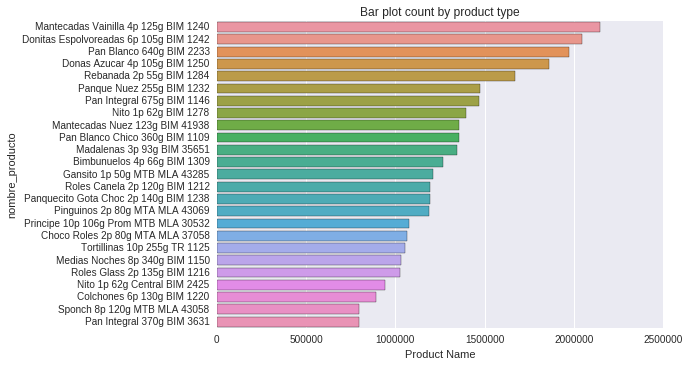

In [14]:
sns.plt.title('Bar plot count by product type')
plot = sns.barplot(x='count', y='nombre_producto', data=product_grouped_pandas.head(25))
plot.set(xlabel='Product Name')

## Bar plot sale unitary today

In [166]:
sale_uni_grouped_pandas = train_table_df.groupBy('sale_uni_today').count().toPandas()
sale_uni_grouped_pandas = sale_uni_grouped_pandas.sort_values(by='count', ascending=0)

In [167]:
sale_uni_grouped_pandas.head(10)

,sale_uni_today,count
2036,2.0,15299482
1935,1.0,13496679
1023,3.0,9271143
0,4.0,7260737
1605,5.0,5707842
1108,6.0,4272687
1685,10.0,2929543
77,8.0,2423855
577,7.0,1762233
1936,9.0,1191273


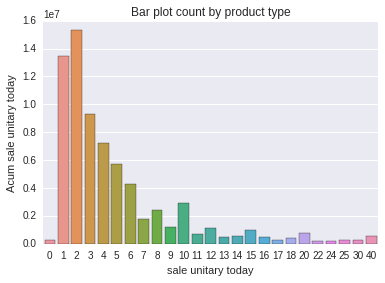

In [168]:
sale_uni_grouped_pandas[['sale_uni_today']] = sale_uni_grouped_pandas[['sale_uni_today']].astype(int)
sale_uni_grouped_pandas = sale_uni_grouped_pandas.sort_values(by='count', ascending=0)
sns.plt.title('Bar plot count by product type')
plot = sns.barplot(x='sale_uni_today', y='count', data=sale_uni_grouped_pandas.head(25))
plot.set(xlabel='sale unitary today')
plot.set(ylabel='Acum sale unitary today')

## Sale unity today for "Mantecadas Vainilla 4p 125g BIM 1240" distribution

In [169]:
product_grouped_pandas = (train_table_df.join(product_table_df, 'product_id')
                                        .select(product_table_df.product_name, train_table_df.sale_uni_today)
                                        .filter(product_table_df.product_name == 'Mantecadas Vainilla 4p 125g BIM 1240')
                                        .toPandas())

/home/jasam/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


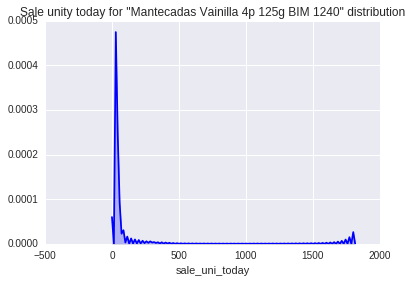

In [170]:
#product_grouped_pandas
product_grouped_pandas.loc[:,('sale_uni_today')] = product_grouped_pandas.sale_uni_today.astype(int)
sns.plt.title('Sale unity today for "Mantecadas Vainilla 4p 125g BIM 1240" distribution')
sns.distplot(product_grouped_pandas.sale_uni_today, hist=False, color="b", kde_kws={"shade": True})

## Clientes por registros

In [38]:
from pyspark.sql.functions import sum
customer_grouped_df = (train_table_df.join(customer_table_df, 'customer_id')
                                     .select(customer_table_df.customer_name, train_table_df.sale_uni_today)
                                     .groupBy('customer_name').agg(sum(train_table_df.sale_uni_today))
                                     )

customer_grouped_pandas = customer_grouped_df.toPandas()

In [44]:
customer_grouped_pandas = customer_grouped_pandas.sort_values(by='sum(sale_uni_today)', ascending=0)
customer_grouped_pandas.head(25)

,customer_name,sum(sale_uni_today)
42189,NO IDENTIFICADO,83656044.0
68501,PUEBLA REMISION,18650001.0
25545,LUPITA,2439982.0
141063,MARY,1430161.0
42176,LA PASADITA,1060571.0
182127,QUERETARO DE ARTEAGA REMISION,909671.0
186439,LA VENTANITA,813362.0
200132,LA GUADALUPANA,754723.0
148571,LA ESPERANZA,669800.0
254901,ALEX,665505.0


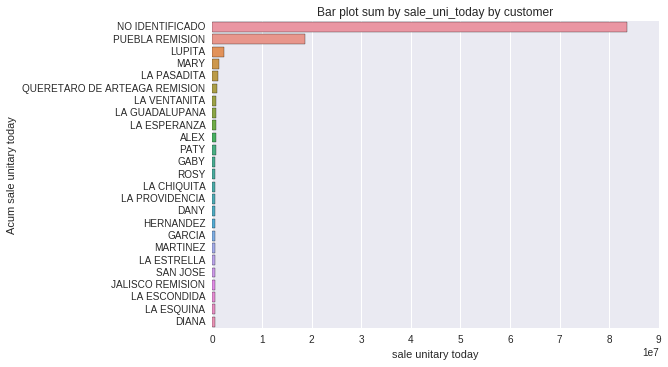

In [48]:
sns.plt.title('Bar plot sum by sale_uni_today by customer')
plot = sns.barplot(x='sum(sale_uni_today)', y='customer_name', data=customer_grouped_pandas.head(25))
plot.set(xlabel='sale unitary today')
plot.set(ylabel='Acum sale unitary today')

In [ ]:
#train_df.filter(train_df['cliente_id'] == 0).count()
train_df.show()

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 38048)
----------------------------------------


Traceback (most recent call last):
  File "/home/jasam/anaconda3/lib/python3.5/socketserver.py", line 318, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/jasam/anaconda3/lib/python3.5/socketserver.py", line 344, in process_request
    self.finish_request(request, client_address)
  File "/home/jasam/anaconda3/lib/python3.5/socketserver.py", line 357, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/jasam/anaconda3/lib/python3.5/socketserver.py", line 684, in __init__
    self.handle()
  File "/home/jasam/spark-1.6.1-bin-hadoop2.6/python/pyspark/accumulators.py", line 235, in handle
    num_updates = read_int(self.rfile)
  File "/home/jasam/spark-1.6.1-bin-hadoop2.6/python/pyspark/serializers.py", line 545, in read_int
    raise EOFError
EOFError
--- Logging error ---
--- Logging error ---
--- Logging error ---
--- Logging error ---
--- Logging error ---
--- Logging error ---
--- Logging error ---
--- 

In [48]:
from pyspark.sql.functions import sum

product_grouped_sum_df = (train_df.join(product_table_df, 'producto_id')
                                  .select(product_table_df.nombre_producto, train_df.venta_uni_hoy)
                                  .groupBy('nombre_producto').agg(sum(train_df.venta_uni_hoy)))
    
product_grouped_sum_df = product_grouped_sum_df.toPandas()

In [51]:
product_grouped_sum_df = product_grouped_sum_df.sort_values(by='sum(venta_uni_hoy)', ascending=0)
product_grouped_sum_df.head(25)

,nombre_producto,sum(venta_uni_hoy)
327,Nito 1p 62g Central BIM 2425,23860309.0
147,Nito 1p 62g BIM 1278,19660667.0
1506,Rebanada 2p 55g BIM 1284,19625219.0
1109,Gansito 1p 50g MTB MLA 43285,15259454.0
1677,Bolsa Mini Rocko 40p 13g CU MLA 36610,12836368.0
1130,Mantecadas Vainilla 4p 125g BIM 1240,12313013.0
588,Donas Azucar 4p 105g BIM 1250,12158858.0
891,Pan Blanco 640g BIM 2233,11204505.0
233,Donitas Espolvoreadas 6p 105g BIM 1242,10469789.0
490,Polvoroncitos Panera 40p 16 25g TR 45143,10062825.0


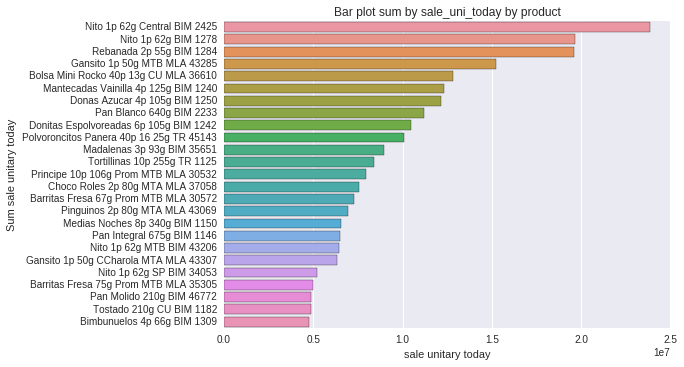

In [53]:
sns.plt.title('Bar plot sum by sale_uni_today by product')
plot = sns.barplot(x='sum(venta_uni_hoy)', y='nombre_producto', data=product_grouped_sum_df.head(25))
plot.set(xlabel='sale unitary today')
plot.set(ylabel='Sum sale unitary today')